
<div dir=rtl >
<h1>قوانین انجمنی</h1>

قوانین انجمنی روابط و وابستگی‌های متقابل بین مجموعه بزرگی از اقلام داده‌ای را نشان می‌دهند. 

مثال متداول در رابطه با کشف قوانین انجمنی "تحلیل سبد خرید" است.  در این فرایند با توجه به اقلام مختلفی که مشتریان در سبد خریدشان قرار می‌دهند، عادات و رفتار خرید مشتریان مورد تحلیل قرار می‌گیرد و می‌توان با شناسایی ارتباط بین محصولات، الگوهای تکرار شونده در حین خرید را بدست آورد.

سه پارامتر مهم:
- Support  میزان محبوبیت یک مجموعه آیتم را با توجه به دفعات حضور در تراکنش‌ها نشان می‌دهد.
- Confidence  احتمال خرید آیتم y در صورت خرید آیتم x را نشان می‌دهد. x -> y
- Lift   ترکیب دو پارامتر بالا می‌باشد.

برای پیاده سازی قوانین انجمنی در این تمرین، از الگوریتم Apriori که یکی از محبوب‌ترین و کارآمدترین الگوریتم‌های این حوزه است استفاده می‌کنیم.


<font color='Green'> پرسش:  تاثیر مقادیر مختلف پارامتر Lift را در احتمال وقوع نتیجه بررسی کنید.  </font>


</div>




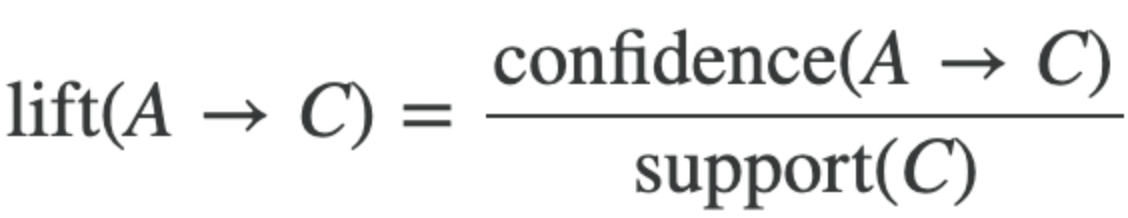

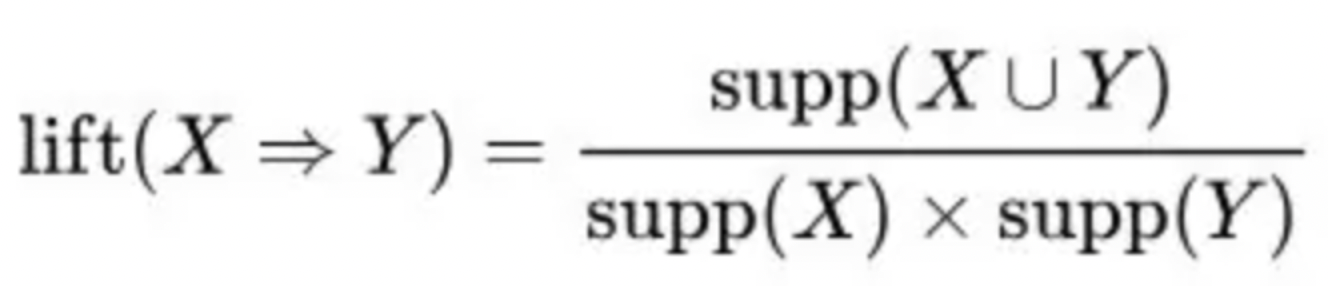

### در بالا دو فرمول بدست آوردن لیفت را ذکر کرده ایم. فرمول اول نشان می دهد که این فرمول کد دیتاست را در نظر گرفته و این باعث می شود که برای یک قانون بتوانیم ببینیم که آیا در این قانون نتیجه همواره رخ می دهد و یا اینکه واقعا رابطه تنگاتنگی بین شرط و نتیجه (یعنی چیزی که ابتدا مشتری خریده و چیزی که با آن همواره می خرد) وجود دارد.
### فرمول دوم نیز بیان می دارد که این معیار سعی می کند میزان استقلال ایکس و ایگرگ از یکدیگر را در نظر بگیرد. با توجه به این فرمول، قوانینی که لیفت آنها کمتر از یک است خوب نیستند چون نشان می دهد که احتمال رخ دادن آنها با هم کمتر از احتمال رخداد هر کدام از آنها به شکل مستقل است و این اصلا مطلوب نیست.


<div dir=rtl >
<h1>الگوریتم Apriori</h1>

روش کار الگوریتم به این صورت است که یک  حداقل مقدار پشتیبانی در نظر گرفته    می‌شود و تکرارها با مجموعه آیتم‌های مکرر اتفاق می‌افتند. در صورتیکه  مجموعه‌ها و زیرمجموعه‌ها مقدار پشتیبانی کمتر از حد آستانه داشته باشند حذف می‌شوند. این روند تا زمانیکه امکان حذف وجود نداشته باشد ادامه می‌یابد. 

در این بخش از تمرین می‌خواهیم الگوریتم apriori را بر روی مجموعه داده Hypermarket_dataset که شامل سفارشات خرید افراد از فروشگاه های مواد غذایی است اعمال کنیم.


</div>





<div dir=rtl >
<h1>آماده‌سازی داده</h1>

<font color='Green'>پرسش: برای شروع کار باید داده‌های دیتاست را در قالب ماتریس پراکنده که محصولات  خریداری شده در ستون‌ و شماره سفارشات خرید به عنوان شاخص (index) هستند آماده کنید. 


برای راحتی کار محصولات خریداری شده در هر سفارش را با اعداد 0,1 کدگذاری کنید.

 نمونه ماتریس خروجی شما:

<img src="https://drive.google.com/uc?id=1eD0jan1ZbeYqSklgK--ks7oeY-MyTA3p"></img>

</div>




In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
# your code here
df = pd.read_csv("Hypermarket_dataset.csv")
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


### هر فردی را به هر تعداد کالایی که خریده است و تعداد آنها مپ می کنیم 

In [5]:
df_2 = pd.crosstab(df['Member_number'], df['itemDescription'])
df_2

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



<div dir=rtl >
<h1>شناسایی الگوهای پر تکرار</h1>

<font color='Green'> پرسش:  با اعمال الگوریتم apriori و به ازای مقدار min_support = 0.07 تمامی الگوهای پر تکرار را تولید نمایید. 

</div>




In [7]:
# your code here
freq_itemsets = apriori(df_2.astype(bool), min_support=0.07, use_colnames=True)

In [8]:
freq_itemsets

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.158799,(bottled beer)
4,0.213699,(bottled water)
...,...,...
78,0.075680,"(yogurt, tropical fruit)"
79,0.079785,"(whipped/sour cream, whole milk)"
80,0.150590,"(yogurt, whole milk)"
81,0.082093,"(other vegetables, rolls/buns, whole milk)"



<div dir=rtl >
<h1>استخراج قوانین انجمنی</h1>


<font color='Green'> پرسش: تابعی بنویسید که با گرفتن دو ورودی confidence و lift قوانین انجمنی حاصل را در خروجی نشان دهد. </br>
برای دو حالت خروجی خود را در گزارش ثبت کنید.


</div>




In [24]:
# your code here
def extract_association_rules(lift, confidence):
    result = association_rules(freq_itemsets, metric="lift", min_threshold=lift)
    return result[result['confidence'] > confidence]

In [25]:
extract_association_rules(0.2, 0.4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
2,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969
8,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
10,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795
12,(citrus fruit),(other vegetables),0.185480,0.376603,0.077476,0.417704,1.109135,0.007623,1.070584
16,(citrus fruit),(whole milk),0.185480,0.458184,0.092355,0.497925,1.086737,0.007371,1.079155
19,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766
20,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775
22,(pastry),(other vegetables),0.177527,0.376603,0.071575,0.403179,1.070567,0.004718,1.044529
25,(pip fruit),(other vegetables),0.170600,0.376603,0.072345,0.424060,1.126013,0.008096,1.082399


In [26]:
extract_association_rules(0.5, 0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
8,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
10,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795
19,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766
20,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775
38,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
42,(pastry),(whole milk),0.177527,0.458184,0.091072,0.513006,1.119651,0.009732,1.112572
44,(pip fruit),(whole milk),0.170600,0.458184,0.086968,0.509774,1.112598,0.008801,1.105239
54,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
67,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146
